In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
import seaborn as sns

In [7]:
bac2017_lp_muestra2=pd.read_csv('bac2017_lp_muestra2.csv')

In [9]:
bac2017_lp_muestra1=pd.read_csv('bac2017_lp_muestra1.csv')

In [10]:
bac2017_lp_muestra2

,ocid,year,tender/status,tender/procurementMethod,tender/value/amount,tender/tenderPeriod/durationInDays,tender/items/0/quantity,outliers_value_amount,outliers_duration,outliers_cantidad
0,ocds-bulbcf-101-0779-LPU17,2017,complete,open,3900000.00,22.0,1.00,2.320089,5.000000,1.000000
1,ocds-bulbcf-101-1181-LPU17,2017,complete,open,16288800.00,9.0,360.00,13.287103,0.666667,0.631818
2,ocds-bulbcf-101-1394-LPU17,2017,cancelled,open,2200000.00,10.0,1.00,0.815187,1.000000,1.000000
3,ocds-bulbcf-101-1466-LPU17,2017,complete,open,7500000.00,7.0,1.00,5.506939,0.000000,1.000000
4,ocds-bulbcf-101-1583-LPU17,2017,complete,open,30000000.00,9.0,1.00,25.424754,0.666667,1.000000
5,ocds-bulbcf-101-1612-LPU17,2017,complete,open,43000000.00,14.0,1.00,36.932825,2.333333,1.000000
6,ocds-bulbcf-146-0075-LPU17,2017,complete,open,1488000.00,8.0,12.00,0.184899,0.333333,0.950000
7,ocds-bulbcf-2051-0906-LPU17,2017,complete,open,2000000.00,13.0,1.00,0.638140,2.000000,1.000000
8,ocds-bulbcf-2051-1006-LPU17,2017,complete,open,4000000.00,11.0,1.00,2.408613,1.333333,1.000000
9,ocds-bulbcf-2051-1098-LPU17,2017,complete,open,3000000.00,9.0,1.00,1.523376,0.666667,1.000000


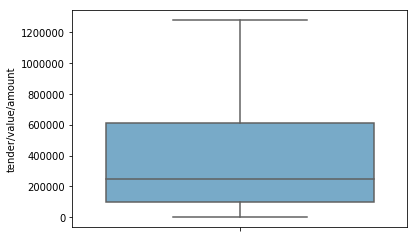

In [11]:
df = bac2017_lp_muestra1
sns.boxplot( y=df["tender/value/amount"], palette="Blues");

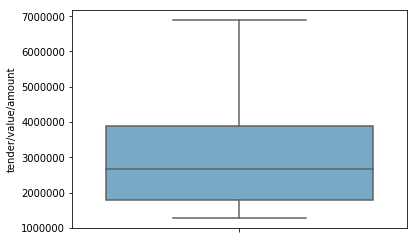

In [13]:
df = bac2017_lp_muestra2[bac2017_lp_muestra2['outliers_value_amount']<=5]
sns.boxplot( y=df["tender/value/amount"], palette="Blues");

In [14]:
bac2017_lp_muestra2=bac2017_lp_muestra2[bac2017_lp_muestra2['outliers_value_amount']<=5]

## Estandarizacion

In [15]:
X1 = bac2017_lp_muestra1.iloc[:,4:7].values

X2 = bac2017_lp_muestra2.iloc[:,4:7].values

y1 = bac2017_lp_muestra1.iloc[:,2].values
y2 = bac2017_lp_muestra2.iloc[:,2].values



In [16]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
X1std = StandardScaler().fit_transform(X1)
X2std = StandardScaler().fit_transform(X2)


In [17]:
X1std

array([[ 0.09820688, -0.63021371, -0.25583808],
       [ 2.34258599,  0.40199812, -0.25571513],
       [ 0.96142961, -0.21732897, -0.25534629],
       ...,
       [ 2.48645069,  0.19555576, -0.25620692],
       [ 1.91097462, -0.42377134, -0.25583808],
       [ 2.34258599, -0.63021371, -0.25628888]])

In [18]:
X2std

array([[ 0.67540993,  2.2586252 , -0.33982799],
       [-0.5421047 ,  0.14183735, -0.33982799],
       [-1.05202848, -0.21096062, -0.33972098],
       ...,
       [ 0.61095328, -0.74015758, -0.33982799],
       [-0.68534172, -0.5637586 , -0.33982799],
       [ 2.10778009, -1.09295556, -0.33982799]])

In [19]:
np.set_printoptions(suppress=True)

# Calculamos la matriz de covarianza

Tiene 1 en la diagonal principal, al estandarizar las variables su varianza es igual a 1. 

In [20]:

X1_cov=np.cov(X1std.T)
print('Matriz de covarianza de los datos estandarizados 1: \n%s' %np.cov(X1std.T))

Matriz de covarianza de los datos estandarizados 1: 
[[1.00195695 0.1057916  0.21337999]
 [0.1057916  1.00195695 0.02225987]
 [0.21337999 0.02225987 1.00195695]]


In [53]:
pd.DataFrame(np.cov(X_std17.T), columns=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity'], index=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity']).to_excel('cov17.xlsx', index=False)

NameError: name 'X_std17' is not defined

In [21]:
X2_cov=np.cov(X2std.T)

print('Matriz de covarianza de los datos estandarizados 2: \n%s' %np.cov(X2std.T))

Matriz de covarianza de los datos estandarizados 2: 
[[ 1.00255102 -0.03362703  0.11085849]
 [-0.03362703  1.00255102  0.03780484]
 [ 0.11085849  0.03780484  1.00255102]]


In [50]:
pd.DataFrame(np.cov(X_std18.T), columns=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity'], index=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity']).to_excel('cov18.xlsx', index=False)

# Calculamos los autovalores y autovectores de la matriz y los mostramos


In [22]:
cov_mat1 = np.cov(X1std.T)

eig_vals1, eig_vecs1 = np.linalg.eig(X1_cov)

print('Autovectores \n%s' %eig_vecs1)
print('\nAutovalores \n%s' %eig_vals1)

Autovectores 
[[ 0.69285977  0.71880657  0.0571178 ]
 [ 0.35266032 -0.26870523 -0.89634156]
 [ 0.62894836 -0.64118219  0.4396696 ]]

Autovalores 
[1.24950126 0.77207284 0.98429675]


In [23]:
cov_mat2 = np.cov(X2std.T)

eig_vals2, eig_vecs2 = np.linalg.eig(X2_cov)

print('Autovectores \n%s' %eig_vecs2)
print('\nAutovalores \n%s' %eig_vals2)

Autovectores 
[[ 0.65622876  0.70199753 -0.27670071]
 [ 0.36121981  0.02969298  0.93200782]
 [-0.66248326  0.71156011  0.23409003]]

Autovalores 
[0.87212601 1.11349727 1.02202978]


In [24]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals1[i]), eig_vecs1[:,i]) for i in range(len(eig_vals1))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente

for i in eig_pairs:
    print('Autovalores en orden descendiente:')
    print(i[0])
    print('Autovectores:')
    print(i[1])
    

Autovalores en orden descendiente:
1.2495012595944317
Autovectores:
[0.69285977 0.35266032 0.62894836]
Autovalores en orden descendiente:
0.9842967452179144
Autovectores:
[ 0.0571178  -0.89634156  0.4396696 ]
Autovalores en orden descendiente:
0.772072836674933
Autovectores:
[ 0.71880657 -0.26870523 -0.64118219]


In [25]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals2[i]), eig_vecs2[:,i]) for i in range(len(eig_vals2))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente

for i in eig_pairs:
    print('Autovalores en orden descendiente:')
    print(i[0])
    print('Autovectores:')
    print(i[1])

Autovalores en orden descendiente:
1.1134972694487968
Autovectores:
[0.70199753 0.02969298 0.71156011]
Autovalores en orden descendiente:
1.022029783261019
Autovectores:
[-0.27670071  0.93200782  0.23409003]
Autovalores en orden descendiente:
0.872126008514672
Autovectores:
[ 0.65622876  0.36121981 -0.66248326]


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

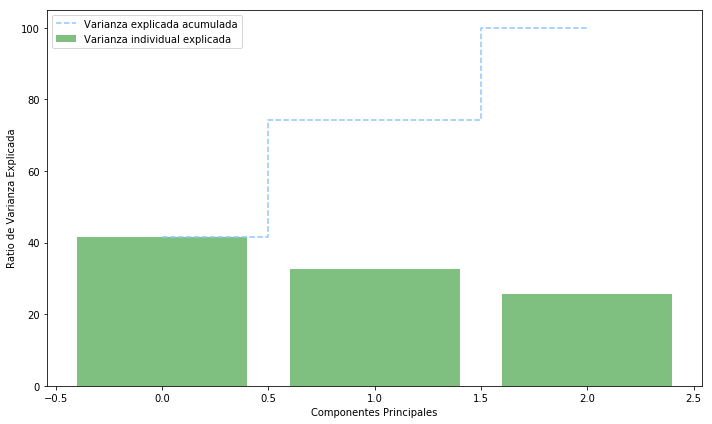

In [27]:
# A partir de los autovalores, calculamos la varianza explicada

tot = sum(eig_vals1)
var_exp = [(i / tot)*100 for i in sorted(eig_vals1, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(3), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [28]:
var_exp

[41.568694248226215, 32.7458096879137, 25.68549606386008]

In [29]:
var_exp[0]+var_exp[1]

74.31450393613991

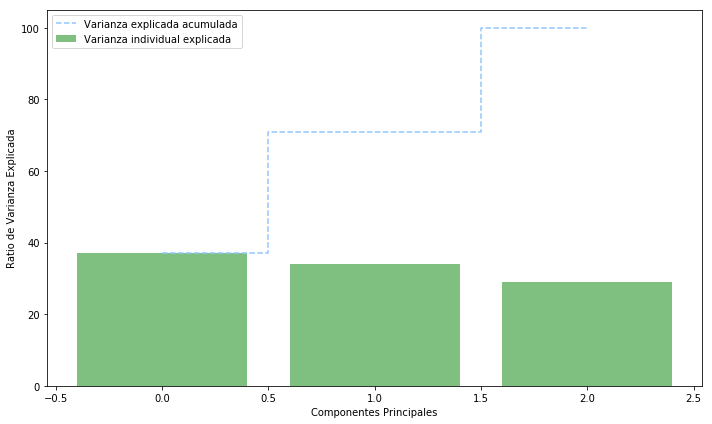

In [30]:
# A partir de los autovalores, calculamos la varianza explicada

tot = sum(eig_vals2)
var_exp = [(i / tot)*100 for i in sorted(eig_vals2, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(3), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [31]:
var_exp[0]+var_exp[1]

71.00310472114066

In [32]:
var_exp[0]+var_exp[1]
var_exp[2]

28.99689527885934

In [33]:
pd.Series(y2).unique()

array(['complete', 'cancelled', 'unsuccessful', 'active'], dtype=object)

## Ejecuto el algoritmo PCA

## muestra 1

In [55]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

## agrego la columna con las etiquetas que me interesan

In [56]:
finalDf = pd.concat([principalDf,pd.Series(y1)], axis = 1)



In [57]:
## Mediante la carga factorial de cada variable original respecto de los componentes seleccionados (1 y 2)
pca.fit(X1std)
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.77448622, -0.05666756],
       [ 0.39420755,  0.88927598],
       [ 0.70304534, -0.43620382]])

In [58]:
pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=['PC1', 'PC2'], index=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity'])

,PC1,PC2
tender/value/amount,0.774486,-0.056668
tender/tenderPeriod/durationInDays,0.394208,0.889276
tender/items/0/quantity,0.703045,-0.436204


In [59]:
## PC1 esta correlacionada con las variables 1 y 3
## PC2 correlacionada con la variable 2

El primer factor esta fuertemente correlacionado con las variables originales 1 (tender/value/amount) y 3 (tender/items/0/quantity),

mientras que el segundo factor esta fuertemente correlacionado con la varible original 2 (tender/tenderPeriod/durationInDays)

# Etiqueto PC1: "Precio y cantidad" en tanto esta afectado por el monto total por el cual el gobierno esta dispuesto a licitar


# Etiqueto PC2: "Duración del proceso" en tanto esta afectado por la duración del proceso licitatorio.        

In [60]:
finalDf.columns=['Precio y cantidad', 'Duración del proceso', 'target']


## Ploteo los resultados

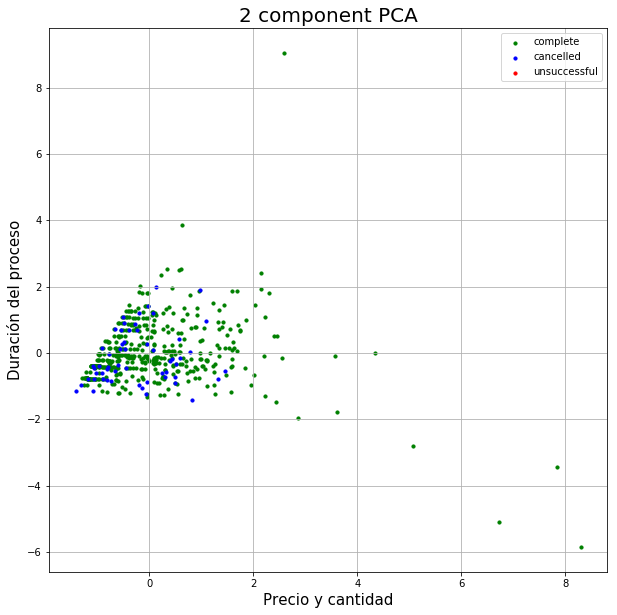

In [61]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['complete', 'cancelled', 'unsuccessful']
colors = [ 'g', 'b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

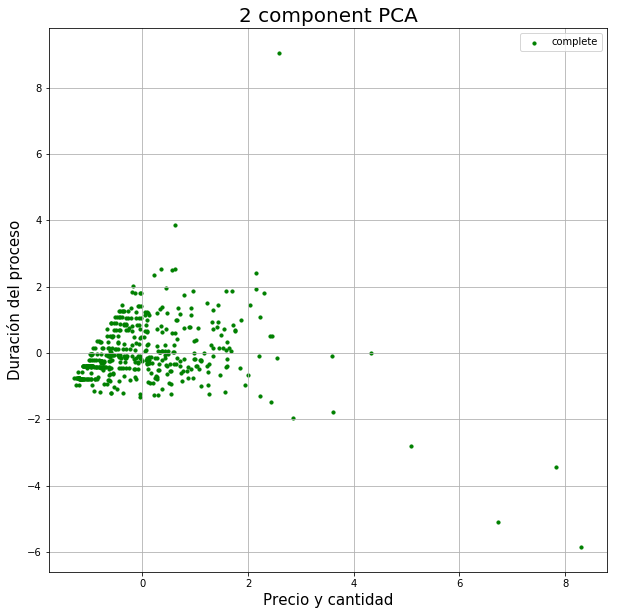

In [62]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['complete', ]
colors = [ 'g',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

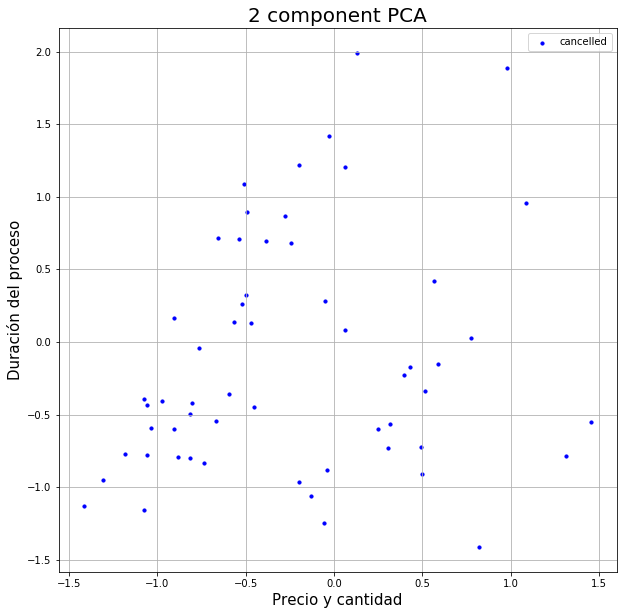

In [63]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [ 'cancelled',]
colors = [  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

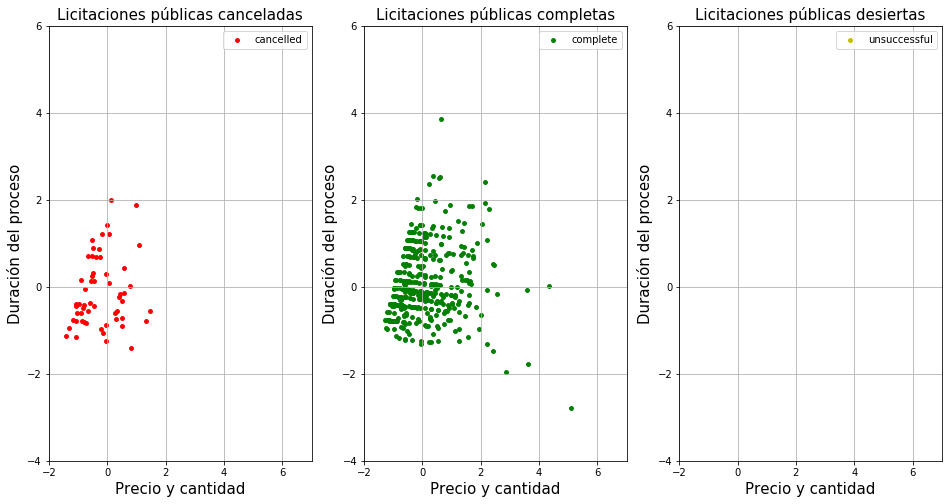

In [64]:
fig, (vax, hax, fax) = plt.subplots(1, 3, figsize=(16, 8))

# ploteo los puntos de los procesos cancelados en el nuevo par de ejes
vax.set_xlabel('Precio y cantidad', fontsize = 15)
vax.set_ylabel('Duración del proceso', fontsize = 15)
vax.set_title('Licitaciones públicas canceladas', fontsize = 15)
vax.set_xlim(-2,7)
vax.set_ylim(-4,6)

targets = ['cancelled']
colors = [ 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    vax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15)

vax.legend(targets)
vax.grid()

# ploteo los puntos de los procesos completos en el nuevo par de ejes
hax.set_xlabel('Precio y cantidad', fontsize = 15)
hax.set_ylabel('Duración del proceso', fontsize = 15)
hax.set_title('Licitaciones públicas completas', fontsize = 15)
hax.set_xlim(-2,7)
hax.set_ylim(-4,6)

targets = ['complete']
colors = [ 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    hax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15
               , )
hax.legend(targets)
hax.grid()

# ploteo los puntos de los procesos no exitosos en el nuevo par de ejes
fax.set_xlabel('Precio y cantidad', fontsize = 15)
fax.set_ylabel('Duración del proceso', fontsize = 15)
fax.set_title('Licitaciones públicas desiertas', fontsize = 15)
fax.set_xlim(-2,7)
fax.set_ylim(-4,6)

targets = ['unsuccessful']
colors = [ 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    fax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15)
fax.legend(targets)
fax.grid()


## Muestra 2

In [65]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X2std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [66]:
finalDf = pd.concat([principalDf,pd.Series(y2)], axis = 1)


In [67]:
## Mediante la carga factorial de cada variable original respecto de los componentes seleccionados (1 y 2)
pca.fit(X2std)
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.7407645 , -0.27973194],
       [ 0.03133274,  0.94221786],
       [ 0.75085516,  0.23665446]])

In [68]:
pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=['PC1', 'PC2'], index=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity'])

,PC1,PC2
tender/value/amount,0.740765,-0.279732
tender/tenderPeriod/durationInDays,0.031333,0.942218
tender/items/0/quantity,0.750855,0.236654


## Etiqueto PC1: "Precio y cantidad" en tanto esta afectado por el monto total por el cual el gobierno esta dispuesto a licitar
## Etiqueto PC2: "Duración del proceso" en tanto esta afectado por la duración del proceso licitatorio.

In [69]:
finalDf.columns=['Precio y cantidad', 'Duración del proceso', 'target']

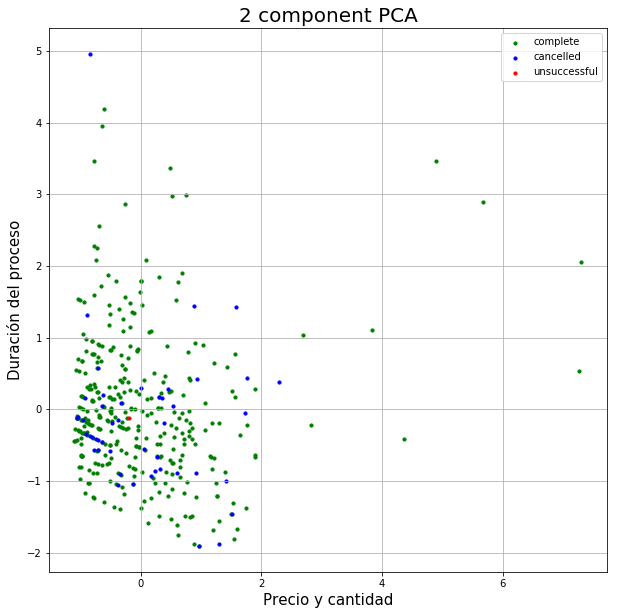

In [70]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['complete', 'cancelled', 'unsuccessful']
colors = [ 'g', 'b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

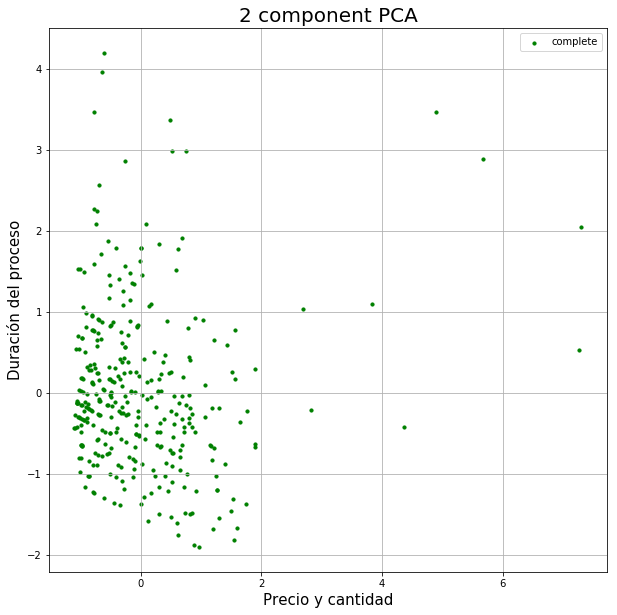

In [71]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['complete', ]
colors = [ 'g',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

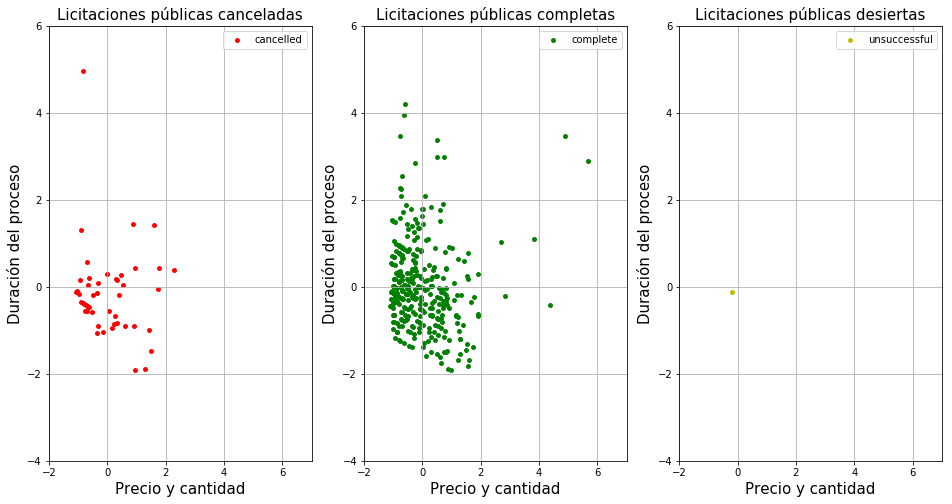

In [72]:
fig, (vax, hax, fax) = plt.subplots(1, 3, figsize=(16, 8))

# ploteo los puntos de los procesos cancelados en el nuevo par de ejes
vax.set_xlabel('Precio y cantidad', fontsize = 15)
vax.set_ylabel('Duración del proceso', fontsize = 15)
vax.set_title('Licitaciones públicas canceladas', fontsize = 15)
vax.set_xlim(-2,7)
vax.set_ylim(-4,6)

targets = ['cancelled']
colors = [ 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    vax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15)

vax.legend(targets)
vax.grid()

# ploteo los puntos de los procesos completos en el nuevo par de ejes
hax.set_xlabel('Precio y cantidad', fontsize = 15)
hax.set_ylabel('Duración del proceso', fontsize = 15)
hax.set_title('Licitaciones públicas completas', fontsize = 15)
hax.set_xlim(-2,7)
hax.set_ylim(-4,6)

targets = ['complete']
colors = [ 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    hax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15
               , )
hax.legend(targets)
hax.grid()

# ploteo los puntos de los procesos no exitosos en el nuevo par de ejes
fax.set_xlabel('Precio y cantidad', fontsize = 15)
fax.set_ylabel('Duración del proceso', fontsize = 15)
fax.set_title('Licitaciones públicas desiertas', fontsize = 15)
fax.set_xlim(-2,7)
fax.set_ylim(-4,6)

targets = ['unsuccessful']
colors = [ 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    fax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15)
fax.legend(targets)
fax.grid()